# Decision Tree Regression

### Importing libraries

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate

### Loading the dataset

In [23]:
data = pd.read_csv('../dataset/spotify_features.csv', sep=',')
data.head()

,track_popularity,instrumentalness,duration_ms,energy,acousticness,album_month,danceability,loudness,liveness,genre_code,valence,artist_code,speechiness
0,67.0,0.004210,162600.0,0.815,0.0724,12,0.726,-4.969,0.35700,2,0.693000,4535,0.106983
1,70.0,0.000023,176616.0,0.931,0.0794,7,0.675,-3.432,0.19031,2,0.613000,7724,0.074200
2,60.0,0.000009,169093.0,0.930,0.0287,7,0.718,-3.778,0.20400,2,0.509838,6862,0.102000
3,62.0,0.000000,187675.0,0.856,0.1870,7,0.449,-4.788,0.17600,2,0.152000,3635,0.062300
4,58.0,0.000005,207894.0,0.923,0.1460,6,0.679,-6.500,0.12400,2,0.752000,2056,0.181000


### Data preprocessing

In [24]:
X = data.drop(columns=['track_popularity'])
y = data['track_popularity']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25)

print(f'Training set: {X_train.shape}, {y_train.shape}')
print(f'Validation set: {X_val.shape}, {y_val.shape}')
print(f'Test set: {X_test.shape}, {y_test.shape}')

Training set: (11908, 12), (11908,)
Validation set: (3970, 12), (3970,)
Test set: (3970, 12), (3970,)


### Standardization

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

### Training the model

In [26]:
model = DecisionTreeRegressor(max_depth=6, random_state=42)
model.fit(X_train_scaled, y_train)

DecisionTreeRegressor(max_depth=6, random_state=42)

### Model evaluation

In [27]:
train_score = model.score(X_train_scaled, y_train)
val_score = model.score(X_val_scaled, y_val)
test_score = model.score(X_test_scaled, y_test)

print(f"Train R^2: {train_score:.2f}")
print(f"Validation R^2: {val_score:.2f}")
print(f"Test R^2: {test_score:.2f}")

mae = mean_absolute_error(y_test, model.predict(X_test_scaled))
print(f"Mean Absolute Error: {mae:.2f}")
mse = mean_squared_error(y_test, model.predict(X_test_scaled))
print(f"Mean Squared Error: {mse:.2f}")

# slechte resultaat want te veel features

Train R^2: 0.12
Validation R^2: 0.05
Test R^2: 0.05
Mean Absolute Error: 19.02
Mean Squared Error: 549.23


### Cross-validation

In [28]:
scores = cross_validate(model, X, y, cv=6, return_train_score=True)
pd.DataFrame(scores)

,fit_time,score_time,test_score,train_score
0,0.065958,0.001042,-0.043551,0.111585
1,0.060835,0.001001,-0.110141,0.132094
2,0.057910,0.001591,-0.092056,0.130069
3,0.059599,0.001079,0.006921,0.108368
4,0.097067,0.001092,-0.126679,0.136728
5,0.069757,0.001000,-0.061391,0.095951


### Visualizations

#### Feature importance

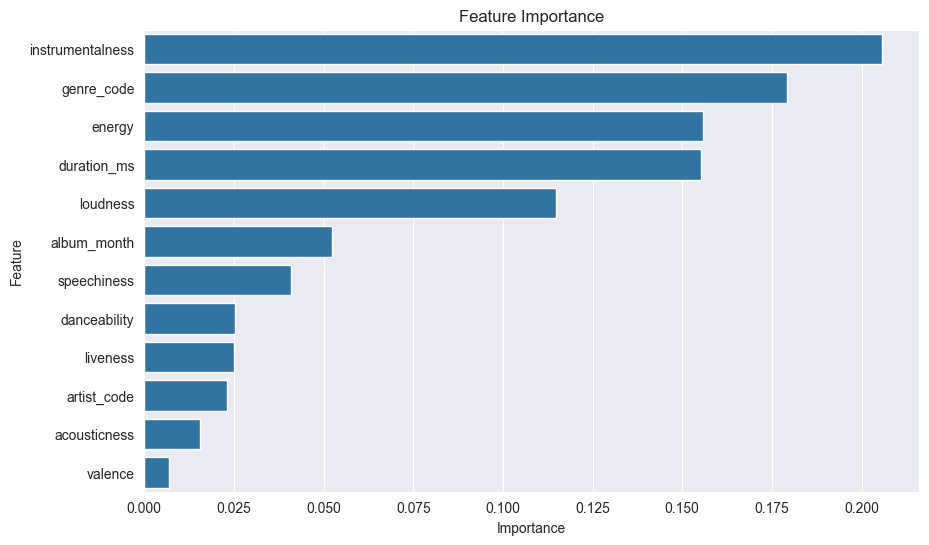

In [29]:
feature_importances = model.feature_importances_
features = X.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

#### Predicted vs Actual

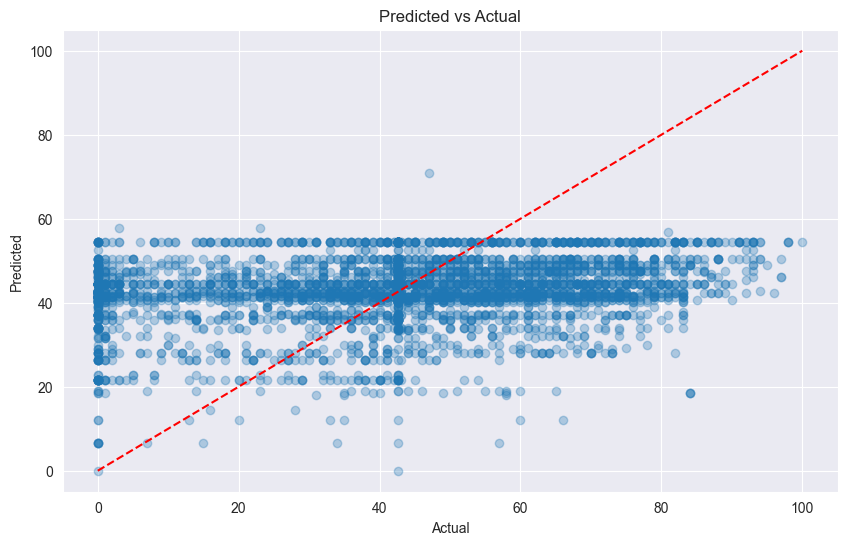

In [30]:
y_pred = model.predict(X_test_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual')
plt.show()

#### Residual plot

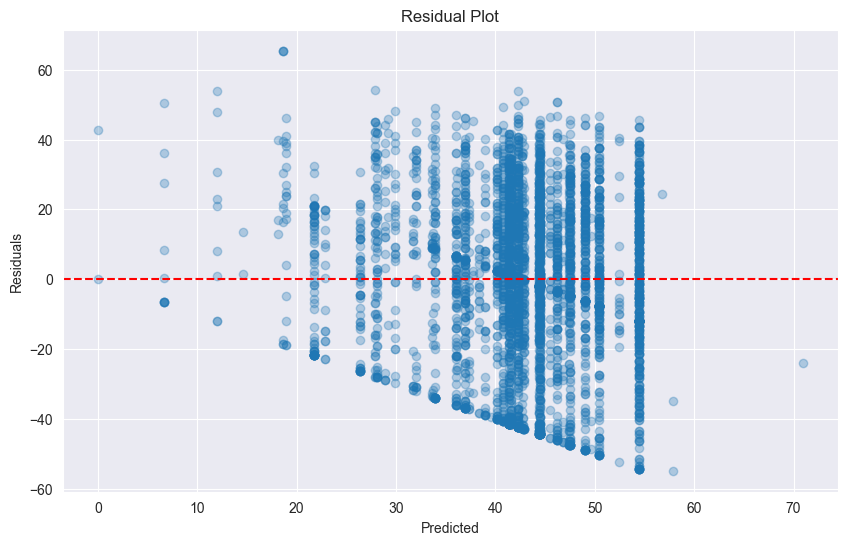

In [31]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()